In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt



from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Input, DepthwiseConv2D, Dropout, Add, GlobalAveragePooling2D, Input, SeparableConv2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential, Model  

print(tf.__version__)
print(tf.test.gpu_device_name())

2.11.0
/device:GPU:0


2023-02-20 21:30:13.267695: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-20 21:30:13.267885: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-20 21:30:13.267952: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-20 21:30:13.268056: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-20 21:30:13.268115: I tensorflow/compiler/xla/stream_executo

Training Images range from 0.00000 to 1.00000
Test     Images range from 0.00000 to 1.00000
(32, 32, 3)


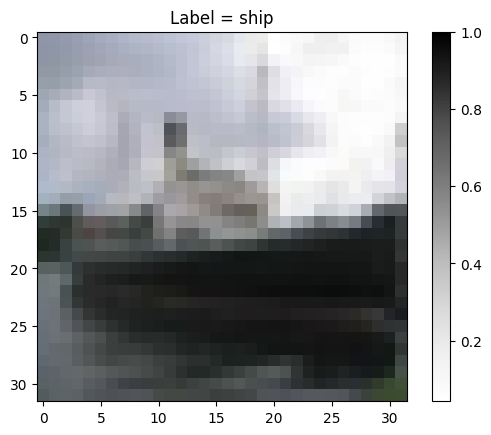

In [7]:
########################################
## Add code here to Load the CIFAR10 data set
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

# Now separate out a validation set.
val_frac = 0.1
num_val_samples = int(len(train_images)*val_frac)
# choose num_val_samples indices up to the size of train_images, !replace => no repeats
val_idxs = np.random.choice(np.arange(len(train_images)), size=num_val_samples, replace=False)
trn_idxs = np.setdiff1d(np.arange(len(train_images)), val_idxs)
val_images = train_images[val_idxs, :,:,:]
train_images = train_images[trn_idxs, :,:,:]

val_labels = train_labels[val_idxs]
train_labels = train_labels[trn_idxs]

train_labels = train_labels.squeeze()
test_labels = test_labels.squeeze()
val_labels = val_labels.squeeze()

input_shape  = train_images.shape[1:]
train_images = train_images / 255.0
test_images  = test_images  / 255.0
val_images   = val_images   / 255.0
print("Training Images range from {:2.5f} to {:2.5f}".format(np.min(train_images), np.max(train_images)))
print("Test     Images range from {:2.5f} to {:2.5f}".format(np.min(test_images), np.max(test_images)))

idx = 2401
plt.figure()
plt.imshow(train_images[idx], cmap='Greys')
plt.colorbar()
plt.grid(False)
plt.title("Label = {:}".format(class_names[train_labels[idx]]))
print(input_shape)

In [17]:
def build_model_50k(learning_rate):
    input_shape = (32, 32, 3)

    model = tf.keras.Sequential([
        Input(shape=input_shape),
        Conv2D(32, kernel_size=(3,3), strides=(2,2), activation="relu", padding='same'),
        BatchNormalization(),
        
        SeparableConv2D(64, kernel_size=(3,3), strides=(2,2), activation="relu", padding='same'),
        BatchNormalization(),
        
        SeparableConv2D(64, kernel_size=(3,3), strides=(2,2), activation="relu", padding='same'),
        BatchNormalization(),
        
        SeparableConv2D(64, kernel_size=(3,3), activation="relu", padding='same'),
        BatchNormalization(),

        SeparableConv2D(64, kernel_size=(3,3), activation="relu", padding='same'),
        BatchNormalization(),

        SeparableConv2D(64, kernel_size=(3,3), activation="relu", padding='same'),
        BatchNormalization(),

        SeparableConv2D(64, kernel_size=(3,3), activation="relu", padding='same'),
        BatchNormalization(),
        
        SeparableConv2D(64, kernel_size=(3,3), activation="relu", padding='same'),
        BatchNormalization(),

        SeparableConv2D(64, kernel_size=(3,3), activation="relu", padding='same'),
        BatchNormalization(),
        
        SeparableConv2D(64, kernel_size=(3,3), activation="relu", padding='same'),
        BatchNormalization(),


        #finishing layers
        MaxPooling2D(pool_size=(4, 4), strides=(4, 4)),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(10)
    ])
    
    
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model.compile(optimizer=optimizer,
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    
    return model


In [18]:
model = build_model_50k(learning_rate=4e-3)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 16, 16, 32)        896       
                                                                 
 batch_normalization_30 (Bat  (None, 16, 16, 32)       128       
 chNormalization)                                                
                                                                 
 separable_conv2d_27 (Separa  (None, 8, 8, 64)         2400      
 bleConv2D)                                                      
                                                                 
 batch_normalization_31 (Bat  (None, 8, 8, 64)         256       
 chNormalization)                                                
                                                                 
 separable_conv2d_28 (Separa  (None, 4, 4, 64)         4736      
 bleConv2D)                                           

In [19]:
early_stop = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(train_images, train_labels, epochs=50,
                    validation_data=(val_images, val_labels),
                    callbacks=[early_stop])

Epoch 1/50
1407/1407 [==============================] - 15s 8ms/step - loss: 1.7270 - accuracy: 0.3596 - val_loss: 1.7299 - val_accuracy: 0.4216
Epoch 2/50
1407/1407 [==============================] - 11s 8ms/step - loss: 1.4515 - accuracy: 0.4733 - val_loss: 1.8001 - val_accuracy: 0.4542
Epoch 3/50
1407/1407 [==============================] - 11s 8ms/step - loss: 1.3123 - accuracy: 0.5318 - val_loss: 1.3356 - val_accuracy: 0.5332
Epoch 4/50
1407/1407 [==============================] - 11s 8ms/step - loss: 1.2173 - accuracy: 0.5703 - val_loss: 1.2157 - val_accuracy: 0.5762
Epoch 5/50
1407/1407 [==============================] - 11s 8ms/step - loss: 1.1478 - accuracy: 0.5950 - val_loss: 1.2252 - val_accuracy: 0.5798
Epoch 6/50
1407/1407 [==============================] - 11s 8ms/step - loss: 1.0909 - accuracy: 0.6136 - val_loss: 1.2206 - val_accuracy: 0.5814
Epoch 7/50
1407/1407 [==============================] - 11s 8ms/step - loss: 1.0442 - accuracy: 0.6300 - val_loss: 1.0879 - val_ac

In [20]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.9830 - accuracy: 0.6671
Test accuracy: 0.6671000123023987


In [22]:
def test_model50k_params():
  assert model.count_params() <= 50000

def test_model50k_acc50():
  loss, acc = model.evaluate(test_images, test_labels)
  assert acc >= 0.5

def test_model50k_acc60():
  loss, acc = model.evaluate(test_images, test_labels)
  assert acc >= 0.55


In [23]:
test_model50k_params()
test_model50k_acc50()
test_model50k_acc60()

313/313 [==============================] - 1s 3ms/step - loss: 0.9830 - accuracy: 0.6671


In [24]:
model.save('best_model.h5')